<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>

<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Lesson 1*

# Statistics, Probability and Inference

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [ ]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

In [ ]:
# How can we quickly look at some descriptive statistics of the above dataframe?
df.describe()

## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [2]:
import numpy as np

mu = 0 # mean
sigma = 1 # standard deviation
sample = np.random.normal(mu, sigma, 1000)

In [3]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0);

![The Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.png)

## What is Inferential Statistics?

![stats](https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg)

When we talk about the **population parameters**: we use $\mu$ and $\sigma$ for mean and standard deviation

When we talk about the sample **sample statistics**: we use $\bar{x}$ and s

    


## Hypothesis Testing (T-Tests)

What is A/B testing?  
https://www.convertize.com/what-is-ab-testing/   
https://blog.hubspot.com/blog/tabid/6307/bid/20566/the-button-color-a-b-test-red-beats-green.aspx

#### 3 types of t-tests

There are three main types of t-test:  
-- An Independent Samples t-test compares the means for two groups.  
-- A Paired sample t-test compares means from the same group at different times.  
-- A One sample t-test tests the mean of a single group against a known mean.

#### T-Test Assumptions:  
1. the scale of measurement applied to the data collected follows a continuous or ordinal scale, such as the scores for an IQ test.  
2. the data is collected from a representative, randomly selected portion of the total population.  
3. the data, when plotted, results in a normal distribution, bell-shaped distribution curve.  
4. a reasonably large sample size is used. A larger sample size means the distribution of results should approach a normal bell-shaped curve.  
5. homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal.  

In [7]:
#### Example: sample data -- number of "conversions" between two versions of a website, over 10 days
a=[1136, 1178, 1212, 1193, 1226, 1154, 1230, 1222, 1161, 1148]
b=[1184, 1203, 1219, 1238, 1243, 1204, 1269, 1256, 1156, 1248]

In [20]:
# It looks like B produces more conversions!
print(np.mean(a))
print(np.mean(b))
print(np.mean(b) - np.mean(a))

1186.0
1222.0
36.0


#### Generate a hypothesis
Null hypothesis: website A has the same average conversion rate as website B   
Alternative hypothesis (1-tailed): website A has lower/higher average conversion rate than website B   
Alternative hypothesis (2-tailed): website A has different average conversion rate than website B 

In [8]:
# import
from scipy.stats import ttest_ind

In [14]:
# compare

print(ttest_ind(a,b).pvalue) # one-tailed test
print(ttest_ind(a,b).pvalue/2) # two-tailed test

-2.2795770510504845
0.03504505626727664
0.01752252813363832


In [22]:
# interpret the p-value
print(ttest_ind(a,b).pvalue/2 < 0.05) # 95% confidence interval (alpha = .05)
print(ttest_ind(a,b).pvalue/2 < 0.01) # 99% confidence interval (alpha = .01)
print(ttest_ind(a,b).pvalue/2 < 0.0001) # 99.9% confidence interval (alpha = .001)

True
False
False


In [23]:
# what about the t-statistic?
print(ttest_ind(a,b).statistic)

-2.2795770510504845


![tstat](https://blog.minitab.com/hubfs/Imported_Blog_Media/formula_1t.png)

A common analogy is that the t-value is the signal-to-noise ratio.   
**The numerator is the signal.** You simply take the sample mean and subtract the null hypothesis value. As the difference between the sample mean and the null hypothesis mean increases in either the positive or negative direction, the strength of the signal increases.  
**The denominator is the noise.** The equation in the denominator is a measure of variability known as the standard error of the mean. This statistic indicates how accurately your sample estimates the mean of the population. A larger number indicates that your sample estimate is less precise because it has more random error.  
**Both the signal and noise values are in the units of your data.** If your signal is 6 and the noise is 2, your t-value is 3. This t-value indicates that the difference is 3 times the size of the standard error. However, if there is a difference of the same size but your data have more variability (6), your t-value is only 1. The signal is at the same scale as the noise.  
https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-1-sample-2-sample-and-paired-t-tests

#### Another example: pancakes



Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



#### Our first 2-sample t-test (pancake example)
1) Null Hypothesis: (boring hypothesis)

𝑥¯1==𝑥¯2 

Or that the average cooking time between the two burners is the same.

2) Alternative Hypothesis: (the opposite of the null)

𝑥¯1≠𝑥¯2 

𝑥¯1−𝑥¯2≠0 
3) Confidence Level: The probability of seing a true result in spite of random variability. (How often do I want to make sure that I'm right.) Typically: 95%, 99%, 99.9%

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
# sample 1
mu1 = 180 # sample mean
sigma1 = 5 # standard deviation
sample1 = np.random.normal(mu1, sigma1, 1000)
sample1[:5]

In [ ]:
# sample 2
mu2 = 178.5 # sample mean
sigma2 = 4.25 # standard deviation
sample2 = np.random.normal(mu2, sigma2, 800)
sample2[:5]

In [ ]:
# compare
results=ttest_ind(sample1, sample2)
results

In [ ]:
# what is the p-value?
print(results[1])
print('{:f}'.format(results[1]))
print('{:.15f}'.format(results[1]))

4) T Statistic: A value that falls along a t-distribution.

A vertical bar that falls on our t-distribution
5) P-value: The p-value that we're interested in is (1-Confidence Level) or in our case: .05

The probability of getting this test result (t-statistic) due to random chance.

The probability of our null hypothesis being true.

6) Conclusions:

Due to observing a t-statistic of 8.9 and a resulting p-value of .00000000000000000109, we reject the null hypothesis that the cooking times of these two burners is the same, and suggest the alternative hypothesis, that they are different.

(Because our p-value was less than .05, we reject the null hypothesis).

# Why do we use the t-distribution in hypothesis tests?

![t-distribution-low-dof](https://lambdachops.com/img/t-distribution-low-dof.png)

![t-distribution-approximates-normal](https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/t-distribution-approximates-normal.png?raw=true)

### Helpful video on why we use the t-distribution

<https://www.youtube.com/watch?v=Uv6nGIgZMVw>

However, in order to understand it you'll need to understand what a z-score is:

A z-score calculates the number of standard deviations an observations lies from the population mean. The problem is that in real-world situations, we don't know what the sample mean is, so we have to turn to using the sample mean to estimate the population mean. Because the sample mean is generated from a sample and used to estimate the population mean with some level of uncertainty, it also has its own distribution a nd spread. This means that for low sample sizes both our estimates of the sample mean and sample population are not very precise, they're kind of spread out. It's this spread that makes the t-distribution wider than the normal distribution for low sample sizes. However, with the larger the sample size, the closer the t-distribution approximates the normal distribution.


## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [ ]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

In [ ]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [ ]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

#### Get and prepare the data

In [ ]:
# imports
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [ ]:
# get the data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

In [ ]:
# make into a dataframe
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df = pd.read_csv('house-votes-84.data', 
                 header=None, 
                 names=column_headers,
                 na_values="?")

df.head()

In [ ]:
# recode votes as numeric
df = df.replace({'y': 1, 'n': 0})
df.head()

In [ ]:
# how many from each party?
df['party'].value_counts()

In [ ]:
# how did Republicans vote?
rep = df[df['party']=='republican']
rep.head()

In [ ]:
# how did Democrats vote?
dem = df[df['party']=='democrat']
dem.head()

In [ ]:
# the percentage of republicans who voted "yes" (1) 
# on the handicapped-infants bill

rep['handicapped-infants'].sum()/len(rep)

# len() is counting NaN values too!

In [ ]:
# Remove NaN values from this column

col = rep['handicapped-infants']

np.isnan(col)

handicapped_infants_no_nans = col[~np.isnan(col)]

# The same column as before, but I've dropped the NaN values
handicapped_infants_no_nans

handicapped_infants_no_nans.sum()/len(handicapped_infants_no_nans)

In [ ]:
# Average rate of voting 'yes' on the handicapped-infants
rep['handicapped-infants'].mean()

#### water project bill (two-sample t-test)

1) Null Hypothesis: There is no difference between average voting rates (levels of support) for the water-project bill between democrats and republicans in the house of representatives. (support is equal)

𝑥¯1==𝑥¯2 
Where  𝑥¯1  is the mean of republican votes and  𝑥¯2  is the mean of democrat votes.

2) Alternative Hypothesis:

𝑥¯1≠𝑥¯2 
Levels of support between the two parties will differ.

3) 95% Confidence Level

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
# What is the mean support of Republicans?
rep['water-project'].mean()

In [ ]:
# what is the mean support of Democrats?
dem['water-project'].mean()

In [ ]:
# compare with a t-test:
ttest_ind(rep['water-project'], dem['water-project'])

In [ ]:
# account for NaN's
ttest_ind(rep['water-project'], dem['water-project'], nan_policy='omit')

In [ ]:
# You could also remove NaN values from this column

col = rep['water-project']
rep_water_project_no_nans = col[~np.isnan(col)]

col = dem['water-project']
dem_water_project_no_nans = col[~np.isnan(col)]

# My sample sizes for the two samples:
print(len(rep_water_project_no_nans))
print(len(dem_water_project_no_nans))

When I have multiple samples (using a 2-sample t-test) I will use the smaller of the two samples to determine my degrees of freedom

So in this case, df = 148-1 = 147

4) T-statistic: .089

5) P-value: .929

I want to reject the null hypothesis if my p-value is < .05 or if my p-value is less than (1-confidence_level)

Conclusion: due to a p-value of .929 I fail to reject the null hypothesis that republican and democrat support for the water-project bill is different.

I never say that I "accept" the null hypothesis, I just say that I "fail to reject"

#### 1-sample T-test example

I'm only using one sample, and my null hypothesis will be different.

We're looking at Democrat support of the South-Africa bill

1a) Null Hypothesis:

𝑥¯1  (average dem support for SA bill) == 1.

This says that 100% of democrats support this bill. Full support.

1b) Null Hypothesis:

𝑥¯1  (average dem support for SA bill) == .5

This says that 50% of democrats support this bill. The party is split.

1c) Null Hypothesis:

𝑥¯1  (average dem support for SA bill) == 0.

This says that 0% of democrats support this bill. The party is against the bill.

1d) Null Hypothesis:

𝑥¯1  (average dem support for SA bill) == .78245

This says that 0% of democrats support this bill. The party is against the bill.

**With 1-sample t-tests I can frame that I'm asking through my choice of null hypothesis**

1) Null Hypothesis:  𝑥¯1  (average dem support for SA bill) == .5

This says that 50% of democrats support this bill. The party is split.

2) Alternative Hypothesis: Support is not equal to .5 or 50%

𝑥¯1  (average dem support for SA bill)  ≠  .5

This says nothing about if support is greater than or less than 50%, it's just saying that it's not 50% - it's different, it's something other than 50%.

3) Confidence Level: 95%

In [ ]:
# import
from scipy.stats import ttest_1samp

In [ ]:
# conduct the t-test
ttest_1samp(dem['south-africa'], .5, nan_policy='omit')

Due to a p-value of (basically 0) we reject the null hypothesis that democrat support for the South Africa bill is .5 (split party) and conclude that it is something different.


In [ ]:
# what is the average support among Democrats?
dem['south-africa'].mean()

In [ ]:
# is it significantly different from 90%?
ttest_1samp(dem['south-africa'], .9, nan_policy='omit')

Fail to reject the null hypothesis:

I conclude that that democrat support for the South Africa bill is not significantly different from 90%.

In [ ]:
# what about 89.9?
ttest_1samp(dem['south-africa'], .899, nan_policy='omit')

Due to a p-value of .048, I reject the null hypothesis that democrat support for this bill is 89.9% and suggest the alternative that it is different from 89.9%

### Wine Example

In [1]:
# load the data (wines from Italy)
from sklearn.datasets import load_wine
X = load_wine()

In [8]:
# put that into a dataframe
import pandas as pd
wine=pd.DataFrame(X['data'], columns=X['feature_names'])
wine['origin']=X['target']

In [9]:
# take a look
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,origin
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


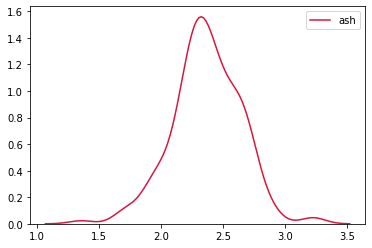

In [12]:
# examine a column. ash for all 3 origin groups.
import seaborn as sns
sns.kdeplot(wine['ash'], color='crimson');

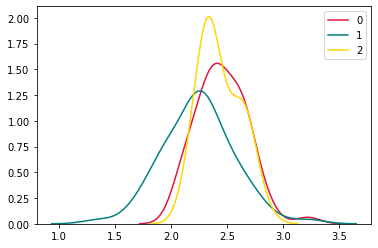

In [27]:
# now for each group. Are these groups different or the same?
colorlist=['crimson', 'teal', 'gold']
for x in [0,1,2]:
    sns.kdeplot(wine[wine['origin']==x]['ash'], color=colorlist[x], label=x);

In [17]:
# are they different or the same?
for x in [0,1,2]:
    print(wine[wine['origin']==x]['ash'].mean())
    print(wine[wine['origin']==x]['ash'].std())
    print('\n')

2.455593220338984
0.2271659820517139


2.244788732394365
0.31546726864369473


2.4370833333333333
0.1846901756805375




In [18]:
# create two samples from the two origins
ash1 = wine[wine['origin']==1]['ash']
ash2 = wine[wine['origin']==2]['ash']

In [19]:
# compare samples 0 and 1. do they have the same ash content in the soil?
stat, pvalue = ttest_ind(ash1, ash2)

NameError: name 'ttest_ind' is not defined

In [ ]:
# is the pvalue less than 0.05?
pvalue <= 0.05

#### Alcohol content

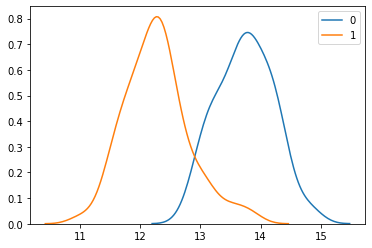

In [26]:
# compare mean alcohol for two origin groups
for group in range(0,2):
    sns.kdeplot(wine[wine['origin']==group]['alcohol'], label=group)

In [21]:
# create the groups
group1=wine[wine['origin']==0]['alcohol']
group2=wine[wine['origin']==1]['alcohol']

In [23]:
# run the t-test and interpret the p-value
stat, pvalue = ttest_ind(group1, group2)

NameError: name 'ttest_ind' is not defined

In [ ]:
# format so it's not in scientific notation
print('{:.15f}'.format(pvalue))

#### Same analysis, on hue

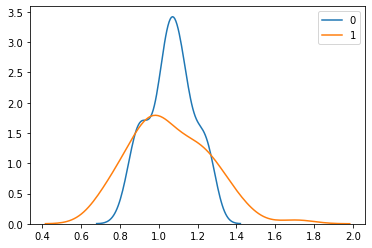

In [25]:
for group in range(0,2):
    sns.kdeplot(wine[wine['origin']==group]['hue'], label=group)

In [ ]:
# create the groups
group1=wine[wine['origin']==0]['hue']
group2=wine[wine['origin']==1]['hue']

In [ ]:
# run the t-test
stat,pvalue=ttest_ind(group1, group2)
print(pvalue<=0.05)

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means